# AI in Health: module 4 (machine learning)

In [1]:
# import libraries
!pip3 install scikit-learn
!pip3 install graphviz
!pip3 install pandas

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# load heart CSV into pandas dataframe 

df = pd.read_csv('/Users/ryanthomas/Downloads/AI-in-Health/heart.csv')
df.head() 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,False
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,False


TA showed her code from last year, these are some of the things in it:

For `id3`
- include all columns from dataset in drop() function
- need to calculate entropy 
- function abbreviated to "le" (...processor) (don't know the library yet)

For `cart`
- include only the specified columns in drop() function
- need to calculate gini 

For the k-fold we can use code to calculate it intead of using a formula by hand. 

In [42]:
# train decision tree

# the code below was from chatGPT

# Assuming your target variable is named 'target_column'
# X = df.drop('target_column', axis=1)  # Features
# y = df['target_column']  # Target variable

# # You can also specify other hyperparameters like criterion, splitter, etc.
# clf = DecisionTreeClassifier(max_depth=3)

# # Train the decision tree on the whole dataset
# clf.fit(X, y)


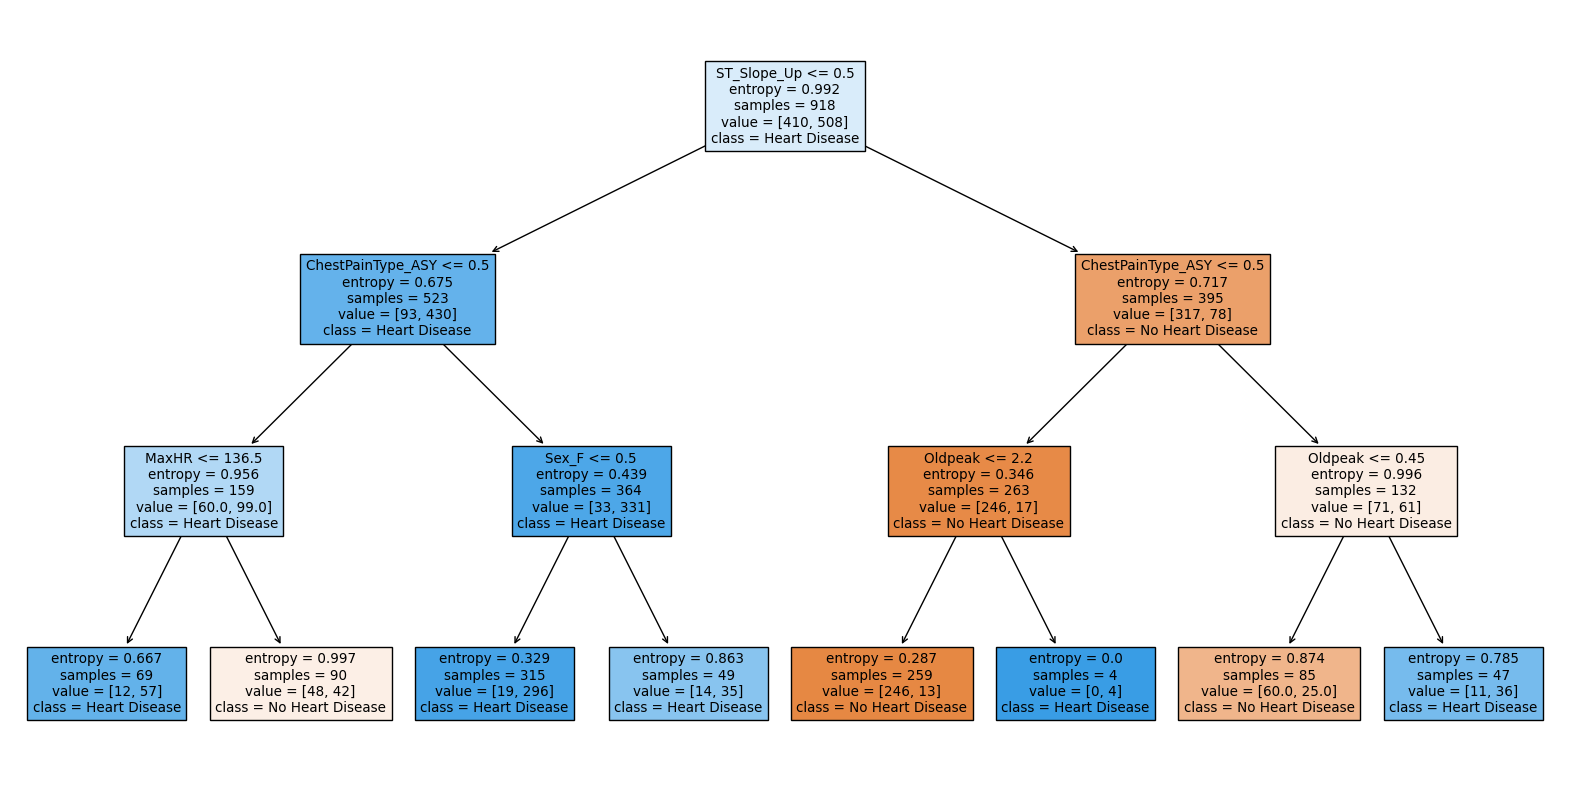

In [48]:
# train decision tree

# Assuming your target variable is named 'target_column'
X = pd.get_dummies(df.drop('HeartDisease', axis=1)) # Features
y = df['HeartDisease'].apply(lambda x:1 if x==True else 0)  # Target variable

# You can also specify other hyperparameters like criterion, splitter, etc.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train the decision tree on the whole dataset
clf.fit(X, y)
# print(X.columns)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()